In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import optimize
from scipy import integrate

In [2]:
def f(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(-x / 2.)

$$ Ax = b $$

In [3]:
## 1

In [4]:
x = np.array([1, 15])
b = f(x)

In [5]:
w_1 = (f(15.) - f(1.)) / 14.
w_0 = f(1.) - w_1
w_0, w_1 

(3.4391451113923299, -0.18692824612091097)

In [6]:
a = np.array([
    [w_0, w_1 * 1.],
    [w_0, w_1 * 15.]
])
x_ = np.linalg.solve(a, b)
x_, np.allclose(np.dot(a, x_), b)

(array([ 1.,  1.]), True)

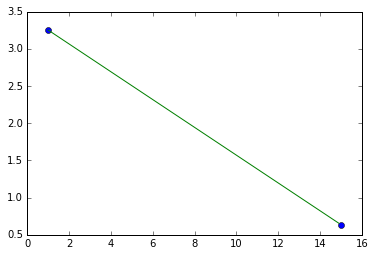

In [7]:
x__ = np.arange(1, 15, 0.1)
y__ = w_0 + w_1 * x__
plt.plot(x, f(x), 'o', x__, y__, '-')
plt.show()

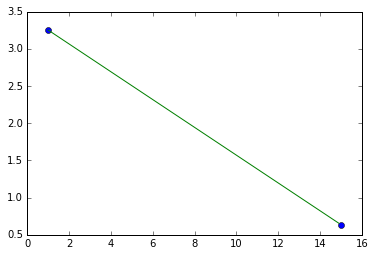

In [8]:
x = np.array([1, 15])
fnew = interpolate.interp1d(x, f(x), kind=1)
xnew = np.arange(1, 15, 0.1)
ynew = fnew(xnew)
plt.plot(x, f(x), 'o', xnew, ynew, '-')
plt.show()

## 2

In [9]:
x = np.array([1, 4, 10, 15])
b = f(x)
print(b)

[ 3.25221687  1.74684595  2.50541641  0.63522142]


In [10]:
points = np.array([1, 4, 10, 15])
A = np.array([[x_**0, x_**1, x_**2, x_**3] for x_ in points])
b = f(points)
print(A)
print(b)

[[   1    1    1    1]
 [   1    4   16   64]
 [   1   10  100 1000]
 [   1   15  225 3375]]
[ 3.25221687  1.74684595  2.50541641  0.63522142]


In [11]:
weights = np.linalg.solve(A, b)
print(weights)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


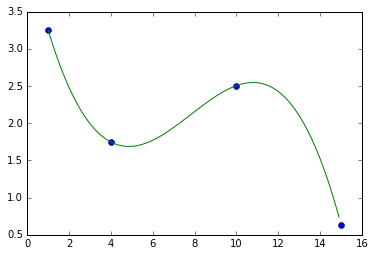

In [12]:
x_approx3 = np.arange(1, 15, 0.1)
y_approx3 = weights[0] + weights[1] * x_approx3 + weights[2] * (x_approx3**2) + weights[3] * (x_approx3**3)
plt.plot(x, f(x), 'o', x_approx3, y_approx3, '-')
plt.show()